# Finned Cylinder
Fundamentals of Heat and Mass Transfer, Incropera, DeWitt, 4th Edition, Example 3.9, page 129

In [1]:
#clear out everything
%reset -f
import math
from sympy import * #import everything
from __future__ import division
from sympy.abc import *
import numpy as np
import matplotlib.pyplot as plt
import platform
from IPython.display import display
from UnitConversion import * #custom .py file with unit conversions
init_printing() #print prettier output
%matplotlib inline

In [2]:
#declare symbols
var('q_t h A_t N A_f eta_F theta_b r_2 r_2c r_1 pi L t Lfin Lfin_c A_p q_wo T_inf T_b q_wo k');

In [3]:
q_t = h * A_t * (1-(N*A_f / A_t)*(1-eta_F))*theta_b #Eq 3.101

In [4]:
#area total
A_t = N * A_f + 2 * pi * r_1 * (L - N*t)
A_t

In [5]:
#area fin
A_f = 2*pi*(r_2c**2 - r_1**2)
A_f

In [6]:
r_2c = r_2 + t/2 #Figure 3.19, page 123
Lfin = r_2 - r_1
Lfin_c = Lfin + t/2
A_p = Lfin_c * t

In [7]:
#Values in preferred units
_L = 0.15 #m, finned tube length
_t = 6/1000 #m, fin thickness
_r_1 = 25/1000 #m, radius to base of fin
_r_2 = 45/1000 #m, radius to tip of fin
_T_b = 500 #K
_T_inf = 300 #K
_h = 50 #W/m2K
_k = 186 #W/mK
_pi = math.pi #constant
_N = 5 #fin count

_theta_b = _T_b - _T_inf #K, must be in K, don't convert, temperature at base of fin (bottom of Table 3.4, page 118)

subsList = {L:_L, t:_t, r_1:_r_1, r_2:_r_2, T_b:_T_b, T_inf:_T_inf, h:_h, k:_k, pi:_pi, N:_N, theta_b:_theta_b}

In [8]:
#evaluate intermediate quatities
_r_2c = r_2c.subs(subsList)
_Lfin_c = Lfin_c.subs(subsList)
_A_p = A_p.subs(subsList)

In [9]:
#add to subsList
subsList.update({'r_2c':_r_2c, 'Lfin_c':_Lfin_c, 'A_p':_A_p})

In [10]:
_A_f = A_f.subs(subsList)
subsList.update({'A_f':_A_f})
print "A_f = " + "%.5f" % _A_f + " m^2" #show N digits after decimal point

_A_t = A_t.subs(subsList)
subsList.update({'A_t':_A_t})
print "A_t = " + "%.5f" % _A_t + " m^2" #show N digits after decimal point

A_f = 0.01055 m^2
A_t = 0.07160 m^2


In [11]:
#estimate fin efficiency
efficiency_function = Lfin_c**(3/2)*(h/(k*A_p))**0.5
efficiency_function.subs(subsList)
fltFinAspectRatio = r_2c/r_1
fltFinAspectRatio.subs(subsList)

In [12]:
#from Figure 3.19 on page 123, fin efficiency ~0.95
_eta_F = 0.95
subsList.update({'eta_F':_eta_F})

In [13]:
#convective heat transfer rate with fins
_q_t = q_t.subs(subsList)
print "q_t = " + "%.0f" % _q_t + " W" #show N digits after decimal point

q_t = 690 W


In [14]:
#heat transfer without fins
q_wo = h*2*pi*r_1*L*theta_b
_q_wo = q_wo.subs(subsList)
print "q_wo = " + "%.0f" % _q_wo + " W" #show N digits after decimal point

q_wo = 236 W


## Now for Our Application

### How to get temperature for this rate?
### How much air do I need for this?
### How much length?

In [15]:
#declare symbols
var('q_cond q_conv q_radx T1 T2 r_0 emiss SBC Tsur A_cond A_rad A_conv');

In [16]:
#initialize results arrays
arrT1 = []
arrT2 = []
arrFinCount = []

#Values in preferred units
_T1 = 2200 #F, temperature of hot surface
_T_inf = 77 #F, temperature of surrounding air
_Tsur = 77 #F, temperature of surrounding surface
_T_b = 2200 #F, temperature of base of fin

_L = .375 #in, finned tube length

_t = .125 #in, fin thickness
_r_0 = 24.25/2 #in, radius internal
_r_1 = 27.25/2 #in, radius to base of fin
_r_2 = 30/2 #in, radius to tip of fin

_h = 14 #W/m2K, convection coefficient (14 ~10mph air blowing across section)
_k = 31.1 #W/mK, thermal conductivity (31.1 for Haynes 160, 0.3 for K23-HS)
_pi = math.pi #constant
_N = 1 #fin count
_emiss = 0.8 #emissivity
_SBC = 5.67E-8 #W/m2K4, Stefan Boltzman constant


#corrected units for equation
_T1 = funFtoK(_T1) #K
_T_inf = funFtoK(_T_inf) #K
_Tsur = funFtoK(_Tsur) #K
_T_b = funFtoK(_T_b) #K
_L = funINtoM(_L) #m
_t = funINtoM(_t) #m
_r_0 = funINtoM(_r_0) #m
_r_1 = funINtoM(_r_1) #m
_r_2 = funINtoM(_r_2) #m

_theta_b = _T_b - _T_inf #K, must be in K, don't convert, temperature at base of fin (bottom of Table 3.4, page 118)

#update subslist
subsList.update({L:_L, t:_t, r_0:_r_0, r_1:_r_1, r_2:_r_2, T_b:_T_b, T_inf:_T_inf, h:_h, k:_k, pi:_pi, N:_N, theta_b:_theta_b})
subsList.update({T1:_T1,Tsur:_Tsur,emiss:_emiss,SBC:_SBC})

#evaluate intermediate quatities
_r_2c = r_2c.subs(subsList)
_Lfin_c = Lfin_c.subs(subsList)
_A_p = A_p.subs(subsList)
subsList.update({'r_2c':_r_2c, 'Lfin_c':_Lfin_c, 'A_p':_A_p})

#areas
#A_cond = pi*(r_1**2 - r_0**2) #area for conduction along tube
A_cond = 24*pi*(funINtoM(1.5/2))**2 #area of just 1.5" rods x 24

A_rad = pi*2*r_1*L #assume fins aren't there for radiation purposes
_A_cond = A_cond.subs(subsList)
_A_rad = A_rad.subs(subsList)
subsList.update({'A_cond':_A_cond, 'A_rad':_A_rad})
print "A_cond = " + "%.5f" % _A_cond + " m^2" #show N digits after decimal point
print "A_rad = " + "%.5f" % _A_rad + " m^2" #show N digits after decimal point

##for verifying Fundamentals of Heat and Mass Transfer, Incropera, DeWitt, 4th Edition, Example 1.5, page 20 still works
#A_rad = A_cond
#A_conv = A_cond
#_A_conv = A_conv.subs(subsList)
#print "A_conv = " + "%.5f" % _A_conv + " m^2" #show N digits after decimal point

_A_f = A_f.subs(subsList)
subsList.update({'A_f':_A_f})
_A_t = A_t.subs(subsList)
subsList.update({'A_t':_A_t})

print "A_f = " + "%.5f" % _A_f + " m^2" #show N digits after decimal point
print "A_t = " + "%.5f" % _A_t + " m^2" #show N digits after decimal point

#estimate fin efficiency
print "fin efficiency graph (abscissa) = " + "%.2f" % efficiency_function.subs(subsList)
print "fin aspect ratio = " + "%.1f" % fltFinAspectRatio.subs(subsList)

A_cond = 0.02736 m^2
A_rad = 0.02071 m^2
A_f = 0.16717 m^2
A_t = 0.18097 m^2
fin efficiency graph (abscissa) = 0.43
fin aspect ratio = 1.1


In [17]:
#from Figure 3.19 on page 123, fin efficiency:
#deeper fins increases the area and heat transfer faster than efficiency falls off
_eta_F = 0.85
subsList.update({'eta_F':_eta_F})

In [18]:
#convective heat transfer rate with fins
_q_t = q_t.subs(subsList)
print "q_t = " + "%.0f" % _q_t + " W" #show N digits after decimal point

#heat transfer without fins
_q_wo = q_wo.subs(subsList)
print "q_wo = " + "%.0f" % _q_wo + " W" #show N digits after decimal point

q_t = 2574 W
q_wo = 342 W


In [19]:
#heat transfer equations
#T1 = hot, T2 = cold
q_cond = k*A_cond*(T1-T2)/L

q_conv = q_t #with fins
#q_conv = q_wo #without fins
#for verifying Fundamentals of Heat and Mass Transfer, Incropera, DeWitt, 4th Edition, Example 1.5, page 20 still works
#q_conv = h*A_conv*(T2-T_inf)

q_rad = emiss*SBC*A_rad*(T2**4-Tsur**4)

#eq1 = 0
eq1 = q_cond - q_conv #- q_rad
_eq1 = eq1.subs(subsList)
#_eq1

In [20]:
#set overall fin count
fin_count = 1

#solve for T2
result = solve(_eq1,T2)
_T2 = result[0] #2nd of 4 solutions (only 1 if eliminate radiation)
print "fin_count = " + "%.0f" % fin_count #show 0 digits after decimal point
print "T1 = " + "%.0f" % funKtoF(_T1) + " F" #show 0 digits after decimal point
print "T2 = " + "%.0f" % funKtoF(_T2) + " F" #show 0 digits after decimal point

#store results
arrT1.append(funKtoF(_T1))
arrT2.append(funKtoF(_T2))
arrFinCount.append(fin_count)

fin_count = 1
T1 = 2200 F
T2 = 2148 F


# Now add more fins, with previous starting conditions

In [21]:
#loop
for x in range(1, 100):
    #add a fin
    fin_count += 1

    #Values in preferred units
    _T1 = funKtoF(_T2) #F, temperature of hot surface
    _T_b = _T1 #F, temperature of base of fin

    #corrected units for equation
    _T1 = funFtoK(_T1) #K
    _T_b = funFtoK(_T_b) #K
    _theta_b = _T_b - _T_inf #K, must be in K, don't convert, temperature at base of fin (bottom of Table 3.4, page 118)

    #update subslist
    subsList.update({T_b:_T_b, theta_b:_theta_b, T1:_T1})
 
    #evaluate intermediate quatities
    _r_2c = r_2c.subs(subsList)
    _Lfin_c = Lfin_c.subs(subsList)
    _A_p = A_p.subs(subsList)
    subsList.update({'r_2c':_r_2c, 'Lfin_c':_Lfin_c, 'A_p':_A_p})

    #areas
    _A_cond = A_cond.subs(subsList)
    _A_rad = A_rad.subs(subsList)
    subsList.update({'A_cond':_A_cond, 'A_rad':_A_rad})

    _A_f = A_f.subs(subsList)
    subsList.update({'A_f':_A_f})
    _A_t = A_t.subs(subsList)
    subsList.update({'A_t':_A_t})

    _q_t = q_t.subs(subsList) #convective heat transfer rate with fins
    _q_wo = q_wo.subs(subsList) #heat transfer without fins
    #print "q_t = " + "%.0f" % _q_t + " W" #show N digits after decimal point
    #print "q_wo = " + "%.0f" % _q_wo + " W" #show N digits after decimal point

    _eq1 = eq1.subs(subsList)

    #solve for T2
    result = solve(_eq1,T2)
    _T2 = result[0] #2nd of 4 solutions (only 1 if eliminate radiation)
    
    #print "fin_count = " + "%.0f" % fin_count #show 0 digits after decimal point
    #print "T1 = " + "%.0f" % funKtoF(_T1) + " F" #show 0 digits after decimal point    
    #print "T2 = " + "%.0f" % funKtoF(_T2) + " F" #show 0 digits after decimal point
    
    #store results
    arrT1.append(funKtoF(_T1))
    arrT2.append(funKtoF(_T2))
    arrFinCount.append(fin_count)

print "fin_count = " + "%.0f" % fin_count #show 0 digits after decimal point
print ("finned length = " + str(funMtoIN(_L)*fin_count))
print "T2 = " + "%.0f" % funKtoF(_T2) + " F" #show 0 digits after decimal point

fin_count = 100
finned length = 37.5
T2 = 256 F


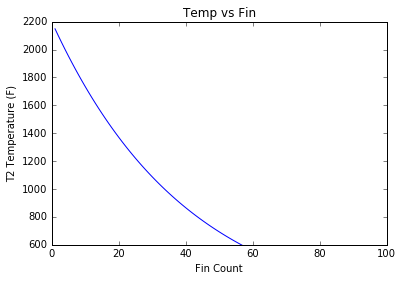

In [22]:
plt.plot(arrFinCount, arrT2)
plt.axis([0, 100, 600, 2200]) #[xmin, xmax, ymin, ymax]
plt.xlabel('Fin Count')
plt.ylabel('T2 Temperature (F)')
plt.title('Temp vs Fin')
plt.show(); #use semicolon to surpress other output

In [23]:
funKtoF(_T2)